In [6]:
from scipy.stats import binom
from math import floor

import matplotlib.pyplot as plt

p=0.005
max_error_rate=10**-4

In [7]:
def cyclotomic_coset(j,n):
    i=j
    ccs={j}
    while (i*2)%n not in ccs:
        i=(i*2)%n
        ccs=ccs.union({i})
    return ccs

def narrow_sense_T(dist,n):
    #print("type dist:", type(dist))
    #print("type n:", type(n))
    T=set()
    for j in range(1,dist):
        T=T.union(cyclotomic_coset(j,n))
    return T

def bit_error_rate(dist,n):
    return 1-binom.cdf(floor((dist-1)/2), n, p)

def smallest_allowed_dist(n,eps):
    for dist in range(2,n):
        #print(dist, bit_error_rate(dist,n))
        if bit_error_rate(dist,n)<=eps:
            return dist
        
def information_rate(n,eps):
    dist=smallest_allowed_dist(n,eps)
    T=narrow_sense_T(dist,n)
    return (n-len(T))/n

In [12]:
for m in range(3,20):
    n=(2**m)-1
    d=smallest_allowed_dist(n,max_error_rate)
    #T=narrow_sense_T(d,n)
    print(m, d, float(information_rate(n,max_error_rate)))

3 5 0.14285714285714285
4 5 0.4666666666666667
5 7 0.5161290322580645
6 9 0.6190476190476191
7 11 0.7244094488188977
8 15 0.7803921568627451
9 21 0.8238747553816047
10 31 0.8533724340175953
11 49 0.8710307767464582
12 79 0.8871794871794871
13 135 0.8952508851178123
14 237 0.8995910394921565
15 427 0.9034089175084689
16 795 0.90429541466392
17 1505 0.903632382449207
18 2895 0.9021183094723109
19 5627 0.8997972484536142


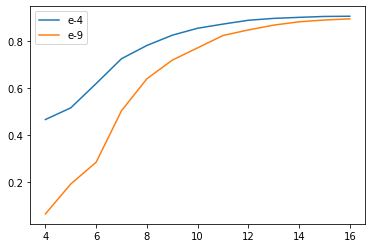

In [9]:
x=list(range(4,17))
y1=[]
y2=[]
for m in x:
    n=(2**m)-1
    y1+=[information_rate(n,10**-4)]
    y2+=[information_rate(n,10**-9)]
    #d1=smallest_allowed_dist(n,10**-4)
    #T1=narrow_sense_T(d,n)
    #y1+=[n-len(T1)]
    #
    #d2=smallest_allowed_dist(n,10**-9)
    #T2=narrow_sense_T(d2,n)
    #y2+=[n-len(T2)]
    

plt.plot(x,y1, label="e-4")
plt.plot(x,y2, label="e-9")
plt.legend()
plt.show()

In [11]:
print(narrow_sense_T(3,9))

{1, 2, 4, 5, 7, 8}
